In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [2]:
train_path = r'C:\Users\tiago\Desktop\code-projects\working\Brain-tumor\data\Training'
test_path = r'C:\Users\tiago\Desktop\code-projects\working\Brain-tumor\data\Testing'
BATCH_SIZE = 10
image_size = (224, 224)

In [3]:
train_batches = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.vgg16.preprocess_input, rescale=1/255.
).flow_from_directory(
    directory=train_path,
    target_size=(224, 224),
    classes=['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor'],
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

Found 2870 images belonging to 4 classes.


In [4]:
test_batches = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.vgg16.preprocess_input, rescale=1/255.
).flow_from_directory(
    directory=test_path,
    target_size=(224, 224),
    classes=['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor'],
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

Found 394 images belonging to 4 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

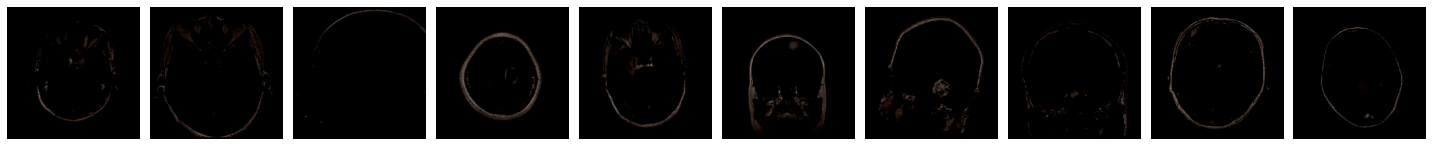

[[1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]]


In [5]:
images, labels = next(train_batches)

def plot(img):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for imgs, ax, in zip(img, axes):
        ax.imshow(imgs)
        ax.axis('off')
    plt.tight_layout()
    plt.show()
plot(images)
print(labels)

In [6]:
model = Sequential()
model.add(Conv2D(16, (3, 3),activation=('relu'),input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(16, (3, 3),activation=('relu'))) #extra
model.add(MaxPooling2D(pool_size=(2, 2))) #extra


model.add(Conv2D(16, (3, 3),activation=('relu')))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(1000,activation=('relu')))
model.add(Dropout(0.2))
model.add(Dense(1000,activation=('relu')))
model.add(Dropout(0.2))
model.add(Dense(4,activation=('softmax')))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(test_batches, epochs=13)

Epoch 1/13
40/40 [==============================] - 7s 170ms/step - loss: 2.6762 - accuracy: 0.2537
Epoch 2/13
40/40 [==============================] - 7s 162ms/step - loss: 1.4065 - accuracy: 0.1545
Epoch 3/13
40/40 [==============================] - 7s 164ms/step - loss: 1.3587 - accuracy: 0.3985
Epoch 4/13
40/40 [==============================] - 7s 170ms/step - loss: 1.2223 - accuracy: 0.4487
Epoch 5/13
40/40 [==============================] - 7s 179ms/step - loss: 1.0852 - accuracy: 0.5314
Epoch 6/13
40/40 [==============================] - 7s 179ms/step - loss: 0.8668 - accuracy: 0.6068
Epoch 7/13
40/40 [==============================] - 7s 178ms/step - loss: 0.6756 - accuracy: 0.7243
Epoch 8/13
40/40 [==============================] - 7s 185ms/step - loss: 0.4450 - accuracy: 0.8053
Epoch 9/13
40/40 [==============================] - 7s 182ms/step - loss: 0.1711 - accuracy: 0.9502
Epoch 10/13
40/40 [==============================] - 8s 191ms/step - loss: 0.0798 - accuracy: 0.9787

In [7]:
img = keras.preprocessing.image.load_img(
    r'C:\Users\tiago\Desktop\code-projects\working\Brain-tumor\data\brain-image.jpg',
    target_size = image_size
)

img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create batch axis

predictions = model.predict(img_array)
score = predictions[0]


In [8]:
print(score)

[0. 1. 0. 0.]
